## Codes for generate figure 2

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
df_filename = 'performance_sum.txt'
df =pd.read_csv(df_filename)
print(f"number of subject: {len(np.unique(df['subj_id']))}") 
df_baseline = df[df['session'] == 'baseline']

number of subject: 20


,subj_id,study_id,session,order,n,accuracy,corrected_accuracy,reaction_t,hit_rate,false_alarm_rate,n_pos_probes,n_pos_probes_percentage,dprime
10,4,16,baseline,1,1,1.000000,0.314244,0.568542,1.000000,0.000000,8,0.200,11.461458
11,4,16,baseline,1,2,0.952381,0.244667,0.580500,0.714286,0.000000,7,0.175,6.296678
12,4,16,baseline,1,3,0.837209,0.201256,0.638333,0.500000,0.032258,12,0.300,1.848596
13,4,16,baseline,1,4,0.720930,0.040000,0.911310,0.222222,0.147059,9,0.225,0.284422
14,4,16,baseline,1,5,0.666667,0.029111,0.763958,0.076923,0.093750,13,0.325,-0.108066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,27,46,baseline,2,4,0.727273,0.051864,0.481833,0.111111,0.114286,9,0.225,-0.016593
356,27,46,baseline,2,5,0.666667,0.038222,0.681042,0.076923,0.093750,13,0.325,-0.108066
357,27,46,baseline,2,6,0.782609,0.087304,0.488472,0.250000,0.105263,8,0.200,0.577630
358,27,46,baseline,2,7,0.638298,-0.026426,0.460917,0.181818,0.222222,11,0.275,-0.143748


## Figure 2a

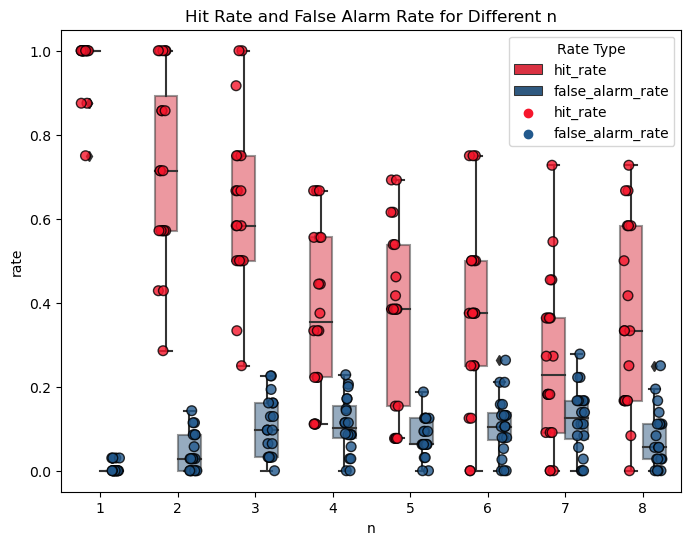

In [2]:

import matplotlib.pyplot as plt
df_melted = df_baseline.melt(id_vars=['n'], value_vars=['hit_rate', 'false_alarm_rate'], 
                    var_name='rate_type', value_name='rate')
fig = plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(data=df_melted, x='n', y='rate', hue='rate_type', palette={'hit_rate': '#F6162C', 'false_alarm_rate': '#22598D'},
            boxprops=dict(alpha = 0.5), width = 0.6)

# Stripplot
sns.stripplot(data=df_melted, x='n', y='rate', hue='rate_type', jitter=True, marker='o', 
              alpha=0.8, dodge=True, edgecolor='black', linewidth = 1, size=7,
              palette={'hit_rate': '#F6162C', 'false_alarm_rate': '#22598D'})

# Adjust legend
plt.legend(title='Rate Type')

plt.title('Hit Rate and False Alarm Rate for Different n')
plt.show()


/Users/brunnerlab/opt/anaconda3/envs/vavns/lib/python3.10/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Users/brunnerlab/opt/anaconda3/envs/vavns/lib/python3.10/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


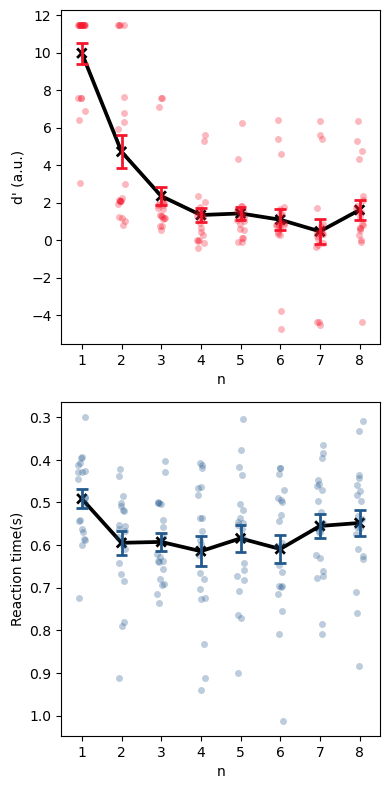

In [3]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(4, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex=ax0)

sns.stripplot(data=df_baseline, x='n', y='dprime', ax=ax0, color='#F6162C', jitter=True, marker='o', alpha=0.3)
sns.pointplot(data=df_baseline, x='n', y='dprime', ax=ax0, color='black', join=True, errorbar=None, markers = 'x')  # Connect mean values

dprime_means = df_baseline.groupby('n')['dprime'].mean()
dprime_se = df_baseline.groupby('n')['dprime'].sem()
for x, (mean, se) in enumerate(zip(dprime_means, dprime_se)):

    ax0.hlines(mean - se, x-0.15, x+0.15, color='#F6162C', lw=2)  # horizontal line for mean
    ax0.hlines(mean + se, x-0.15, x+0.15, color='#F6162C', lw=2)  # horizontal line for mean
    ax0.vlines(x, mean-se, mean+se, color='#F6162C', lw=2)   # vertical lines for standard error

ax0.set_ylabel("d' (a.u.)")

sns.stripplot(data=df_baseline, x='n', y='reaction_t', ax=ax1, color='#22598D', jitter=True, marker='o', alpha=0.3)
sns.pointplot(data=df_baseline, x='n', y='reaction_t', ax=ax1, color='black', join=True, errorbar=None, markers='x')  # Connect mean values

reaction_t_means = df_baseline.groupby('n')['reaction_t'].mean()
reaction_t_se = df_baseline.groupby('n')['reaction_t'].sem()
for x, (mean, se) in enumerate(zip(reaction_t_means, reaction_t_se)):

    ax1.hlines(mean - se, x-0.15, x+0.15, color='#22598D', lw=2)  # horizontal line for mean
    ax1.hlines(mean + se, x-0.15, x+0.15, color='#22598D', lw=2)  # horizontal line for mean
    ax1.vlines(x, mean-se, mean+se, color='#22598D', lw=2)   # vertical lines for standard error

ax1.invert_yaxis()  # Invert the y-axis for reaction_t
ax1.set_ylabel('Reaction time(s)')

plt.tight_layout()
plt.show()


## Run this code in R, Figure 2c

In [ ]:
library(drc)
library(ggplot2)
library(Hmisc)
# load txt
df_filename = 'performance_sum.txt'
df = read.table(df_filename,sep=",", header=TRUE)
# get df_base_line
df_baseline = df[df$session=='baseline',]

model_ar3 <- drm(dprime ~ n, data=df_baseline, fct = AR.3())

# Logistic Model LL.4
model_ll4 <- drm(dprime ~ n, data=df_baseline, fct = LL.4())

# anova is used to compare nested models, which is not applicable in our case
# anova(model_ar3, model_ll4)# F value: The test statistic of the F-test. It tests the hypothesis that the simpler model (with fewer parameters)
# is better than the more complex model.
# p value: The significance of the F-test.
# A low p-value (typically < 0.05) would suggest that the more complex model provides a significantly better fit to 
# the data than the simpler model.
# As you can see, the result shows a Df of 1 (indicating that the more complex model has one additional parameter),
# and a very small p-value (< .001). 
# This means that adding the clarity IV to the model did lead to a significantly improved fit over the model 1.

# Extract AIC and BIC for both models
#  A model with a lower AIC or BIC is typically considered to have a better balance between fit and complexity.
aic_bic_comparison <- data.frame(
  Model = c("AR.3", "LL.4"),
  AIC = c(AIC(model_ar3), AIC(model_ll4)),
  BIC = c(BIC(model_ar3), BIC(model_ll4))
)

print(aic_bic_comparison)

# This is a measure of the spread of the residuals (differences between observed and predicted values). 
# It's essentially the average amount by which the responses deviate from the fitted values. 
# A smaller residual standard error means the model fits the data better.
print(summary(model_ar3))
print(summary(model_ll4))
residuals_values <- residuals(model_ll4)
print(mean(residuals_values))
print(deviance(model_ll4))
# the result shows ar3 can not fit the data, with c being the value when x=0, d being the value when x = infinite,
# e: This parameter controls the rate of decay or the curvature. A higher value of 
# e will result in a steeper decay (or growth, depending on the context and data), 
# while a smaller value will result in a slower, more gradual decay.
# in ll4, c is the lower bound, d is the upper bound, b is the steepness, e is the ed50
predictions <- predict(model_ll4, newdata=new_data)
new_data <- data.frame(n=seq(1, 8, by=0.01))
# to understand t and p value
# The t-value, which is the Wald test statistic (basically, the estimate divided by its standard error) (t-value).
# The p-value, derived from the Wald test statistic (p-value).
# viz
fig = ggplot(df_baseline, aes(x=n, y=dprime)) +
  stat_summary(fun.data=mean_se, geom="errorbar", width=0.2, color="#F6162C") +
  stat_summary(fun=mean, geom="point", size=3, color="#F6162C") +
  geom_line(data=new_data, aes(x=n, y=predictions), color="blue") +
  labs(title="fitting dprime", x="n", y="d'") +
 geom_hline(yintercept=11.4, color="black", linetype="dashed") +
  geom_hline(yintercept=1.0, color="black", linetype="dashed") +
  
  # Add vertical line at x = 1.7
  geom_vline(xintercept=1.7, color="black", linetype="dashed") +
  
  theme_minimal()

